# Info 2950 Project Phase II
## Google Political Advertising

### Eliza Salamon, Laurel Prime, Melissa LaFountain
***

## Research Questions

 - How do different targeting attributes (e.g. age, gender, geo-targeting) affect ad type and ad exposure?
 - How are ads distributed geographically across the country?
 - How does ad spend affect impressions generated?
 ***

## Data Collection and Cleaning

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
raw_data = pd.read_csv('google-political-ads-creative-stats.csv')
raw_data.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Ad_Campaigns_List,Date_Range_Start,Date_Range_End,Num_of_Days,...,Spend_Range_Min_GBP,Spend_Range_Max_GBP,Spend_Range_Min_ILS,Spend_Range_Max_ILS,Spend_Range_Min_NZD,Spend_Range_Max_NZD,Spend_Range_Min_TWD,Spend_Range_Max_TWD,Spend_Range_Min_AUD,Spend_Range_Max_AUD
0,CR104193501419274240,https://transparencyreport.google.com/politica...,Image,"EU, IT",AR100125170957549568,Azione,NaN,2020-10-26,2020-11-25,31,...,0,50.0,0,250.0,0,200.0,0,3000.0,0,150.0
1,CR109957691127889920,https://transparencyreport.google.com/politica...,Video,"EU, IT",AR100125170957549568,Azione,NaN,2020-12-02,2020-12-03,2,...,0,50.0,0,250.0,0,200.0,0,3000.0,0,150.0
2,CR111129083328331776,https://transparencyreport.google.com/politica...,Image,"EU, IT",AR100125170957549568,Azione,NaN,2020-06-28,2020-09-03,35,...,500,25000.0,2500,125000.0,1500,75000.0,30000,1500000.0,1500,50000.0
3,CR112145169511350272,https://transparencyreport.google.com/politica...,Image,"EU, IT",AR100125170957549568,Azione,NaN,2020-10-26,2020-11-02,8,...,0,50.0,0,250.0,0,200.0,0,3000.0,0,150.0
4,CR112255773509156864,https://transparencyreport.google.com/politica...,Image,"EU, IT",AR100125170957549568,Azione,NaN,2021-01-28,2021-02-04,8,...,50,500.0,250,2500.0,200,1500.0,3000,30000.0,150,1500.0


In [3]:
raw_data.columns

Index(['Ad_ID', 'Ad_URL', 'Ad_Type', 'Regions', 'Advertiser_ID',
       'Advertiser_Name', 'Ad_Campaigns_List', 'Date_Range_Start',
       'Date_Range_End', 'Num_of_Days', 'Impressions', 'Spend_USD',
       'First_Served_Timestamp', 'Last_Served_Timestamp', 'Age_Targeting',
       'Gender_Targeting', 'Geo_Targeting_Included', 'Geo_Targeting_Excluded',
       'Spend_Range_Min_USD', 'Spend_Range_Max_USD', 'Spend_Range_Min_EUR',
       'Spend_Range_Max_EUR', 'Spend_Range_Min_INR', 'Spend_Range_Max_INR',
       'Spend_Range_Min_BGN', 'Spend_Range_Max_BGN', 'Spend_Range_Min_HRK',
       'Spend_Range_Max_HRK', 'Spend_Range_Min_CZK', 'Spend_Range_Max_CZK',
       'Spend_Range_Min_DKK', 'Spend_Range_Max_DKK', 'Spend_Range_Min_HUF',
       'Spend_Range_Max_HUF', 'Spend_Range_Min_PLN', 'Spend_Range_Max_PLN',
       'Spend_Range_Min_RON', 'Spend_Range_Max_RON', 'Spend_Range_Min_SEK',
       'Spend_Range_Max_SEK', 'Spend_Range_Min_GBP', 'Spend_Range_Max_GBP',
       'Spend_Range_Min_ILS', 'Spend_R

In [ ]:
raw_data.dtypes

In [5]:
raw_data['Ad_Campaigns_List'].unique()

array([nan])

Remove non US spending ranges, Ad_Id, Ad_URL, Advertiser_ID (not useful to us), specific timestamps (already has number of days with dates), and Ad_Campaigns_List. Additionally, limit regions of ads to only the United States.

In [6]:
columns_of_interest = ['Ad_Type', 'Regions', 'Advertiser_Name', 'Date_Range_Start',
       'Date_Range_End', 'Num_of_Days', 'Impressions', 'Spend_USD','Age_Targeting',
       'Gender_Targeting', 'Geo_Targeting_Included', 'Geo_Targeting_Excluded',
       'Spend_Range_Min_USD', 'Spend_Range_Max_USD']

raw_data = raw_data[columns_of_interest]
raw_data = raw_data.loc[raw_data['Regions'] == 'US']

Select ads that have a minimum cost of $1,000 so as to filter the data to more expensive and likely more impactful  ads

In [7]:
print(raw_data['Spend_Range_Min_USD'].value_counts())
raw_data = raw_data.loc[raw_data['Spend_Range_Min_USD'] >= 1000]

0         392518
100       131844
1000       79110
50000       1261
100000       857
Name: Spend_Range_Min_USD, dtype: int64


In [ ]:
#Change to datetime
raw_data.loc[:, 'Date_Range_Start'] = pd.to_datetime(raw_data['Date_Range_Start'])
raw_data.loc[:, 'Date_Range_End'] = pd.to_datetime(raw_data['Date_Range_End'])

In [9]:
raw_data.to_csv('export_dataframe.csv', index = False, header=True)

In [129]:
clean_data = pd.read_csv('export_dataframe.csv')
clean_data.head()

,Ad_Type,Regions,Advertiser_Name,Date_Range_Start,Date_Range_End,Num_of_Days,Impressions,Spend_USD,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD
0,Text,US,ALEX FOR AZ,2020-07-08,2020-08-04,28,≤ 10k,1k-50k,Not targeted,Not targeted,"85054, 85207, 85215, 85250, 85251, 85253, 8525...",Not targeted,1000,50000.0
1,Text,US,ALEX FOR AZ,2020-07-07,2020-08-04,29,≤ 10k,1k-50k,Not targeted,Not targeted,"85054, 85207, 85215, 85250, 85251, 85253, 8525...",Not targeted,1000,50000.0
2,Text,US,CITIZENS FOR JD WOOTEN,2020-08-28,2020-11-03,64,10k-100k,1k-50k,Not targeted,Not targeted,"27215, 27217, 27233, 27244, 27249, 27253, 2725...",Not targeted,1000,50000.0
3,Video,US,CITIZENS FOR JD WOOTEN,2020-10-28,2020-11-03,7,100k-1M,1k-50k,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","27215, 27217, 27233, 27244, 27249, 27253, 2725...",Not targeted,1000,50000.0
4,Video,US,CITIZENS FOR JD WOOTEN,2020-10-26,2020-11-03,9,10k-100k,1k-50k,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","27215, 27217, 27233, 27244, 27249, 27253, 2725...",Not targeted,1000,50000.0


In [84]:
zips =  pd.read_csv('free-zipcode-database-Primary.csv')
zips.head()

,Zipcode,ZipCodeType,City,State,LocationType,Lat,Long,Location,Decommisioned,TaxReturnsFiled,EstimatedPopulation,TotalWages
0,705,STANDARD,AIBONITO,PR,PRIMARY,18.14,-66.26,NA-US-PR-AIBONITO,False,NaN,NaN,NaN
1,610,STANDARD,ANASCO,PR,PRIMARY,18.28,-67.14,NA-US-PR-ANASCO,False,NaN,NaN,NaN
2,611,PO BOX,ANGELES,PR,PRIMARY,18.28,-66.79,NA-US-PR-ANGELES,False,NaN,NaN,NaN
3,612,STANDARD,ARECIBO,PR,PRIMARY,18.45,-66.73,NA-US-PR-ARECIBO,False,NaN,NaN,NaN
4,601,STANDARD,ADJUNTAS,PR,PRIMARY,18.16,-66.72,NA-US-PR-ADJUNTAS,False,NaN,NaN,NaN


In [12]:
zips['State'].unique()

array(['PR', 'NJ', 'NY', 'AE', 'VI', 'MA', 'ME', 'NH', 'VT', 'CT', 'RI',
       'DE', 'PA', 'WV', 'KY', 'TN', 'VA', 'GA', 'IN', 'OH', 'IL', 'IA',
       'MN', 'WI', 'MT', 'ND', 'SD', 'KS', 'MO', 'NE', 'CO', 'WY', 'ID',
       'UT', 'AZ', 'NM', 'TX', 'CA', 'NV', 'OR', 'WA', 'AK', 'GU', 'HI',
       'AS', 'PW', 'FM', 'MP', 'MH', 'FL', 'SC', 'AL', 'MS', 'LA', 'AR',
       'OK', 'MI', 'DC', 'MD', 'NC', 'AA', 'AP'], dtype=object)

In [13]:
type(clean_data.loc[0, 'Geo_Targeting_Included'])

str

In [14]:
list_zips = [item.split(', ') for item in clean_data['Geo_Targeting_Included']]

In [ ]:
#list for new column
zip_column = []
#loop through geographic targetings
for x in range(len(list_zips)):
    if(x%5000 == 0):
        #track loop progress
        print(x)
    list_of_zips = []
    for zip in list_zips[x]:
        if zip.isdigit():
            #find numeric zip codes from the zipcode database, and save to nested list
            int_zip = int(zip)
            zips_item = zips.loc[zips['Zipcode'] == int_zip]
            if(len(zips_item) == 1):
                list_of_zips.append(zips_item['City'].item().capitalize())
        else:
            list_of_zips.append(zip)
    #append list to column list
    zip_column.append(set(list_of_zips))

In [24]:
clean_data['Areas_Targeted'] = zip_column
clean_data.head()

,Ad_Type,Regions,Advertiser_Name,Date_Range_Start,Date_Range_End,Num_of_Days,Impressions,Spend_USD,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD,Areas_Targeted
0,Text,US,ALEX FOR AZ,2020-07-08,2020-08-04,28,≤ 10k,1k-50k,Not targeted,Not targeted,"85054, 85207, 85215, 85250, 85251, 85253, 8525...",Not targeted,1000,50000.0,"{Cave creek, Phoenix, Fort mcdowell, Scottsdal..."
1,Text,US,ALEX FOR AZ,2020-07-07,2020-08-04,29,≤ 10k,1k-50k,Not targeted,Not targeted,"85054, 85207, 85215, 85250, 85251, 85253, 8525...",Not targeted,1000,50000.0,"{Cave creek, Phoenix, Fort mcdowell, Scottsdal..."
2,Text,US,CITIZENS FOR JD WOOTEN,2020-08-28,2020-11-03,64,10k-100k,1k-50k,Not targeted,Not targeted,"27215, 27217, 27233, 27244, 27249, 27253, 2725...",Not targeted,1000,50000.0,"{Julian, Snow camp, Greensboro, Graham, Climax..."
3,Video,US,CITIZENS FOR JD WOOTEN,2020-10-28,2020-11-03,7,100k-1M,1k-50k,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","27215, 27217, 27233, 27244, 27249, 27253, 2725...",Not targeted,1000,50000.0,"{Julian, Snow camp, Greensboro, Graham, Climax..."
4,Video,US,CITIZENS FOR JD WOOTEN,2020-10-26,2020-11-03,9,10k-100k,1k-50k,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","27215, 27217, 27233, 27244, 27249, 27253, 2725...",Not targeted,1000,50000.0,"{Julian, Snow camp, Greensboro, Graham, Climax..."


In [44]:
print(clean_data['Ad_Type'].value_counts())
print('\n')
print(clean_data['Age_Targeting'].value_counts())
print('\n')
print(clean_data['Gender_Targeting'].value_counts())

Video    55847
Text     16602
Image     8779
Name: Ad_Type, dtype: int64


Not targeted                                                36235
18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknown age         19822
18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknown age, ≤18    19333
18-24, 25-34, 35-44, 45-54, 55-64, ≥65                       2775
35-44, 45-54, 55-64, ≥65                                     1181
18-24, 25-34                                                  279
45-54, 55-64, ≥65                                             236
35-44, 45-54, 55-64, ≥65, Unknown age                         230
25-34, 35-44, 45-54, 55-64, ≥65                               211
18-24, 25-34, 35-44, 45-54                                    183
18-24, 25-34, 35-44                                           121
35-44                                                         102
25-34                                                          81
18-24, 25-34, 55-64, ≥65, Unknown age                          60
5

In [62]:
ad_types = pd.DataFrame({'Ad_Type_Code' : [1, 2, 3], 'Ad_Type' : ['Video', 'Text', 'Image']})
ad_types.head()

,Ad_Type_Code,Ad_Type
0,1,Video
1,2,Text
2,3,Image


In [63]:
google_data = pd.merge(clean_data, ad_types, on = 'Ad_Type')

In [64]:
google_data['Impressions'].unique()

array(['≤ 10k', '10k-100k', '100k-1M', '1M-10M', '> 10M'], dtype=object)

In [ ]:
impression_types = pd.DataFrame({'Impression_Type' : [1, 2, 3, 4, 5], 'Impressions' : ['≤ 10k', '10k-100k', '100k-1M', '1M-10M', '> 10M']})
google_data2 = pd.merge(google_data, impression_types, on = 'Impressions')

In [66]:
google_data2.to_csv('final_dataframe.csv', index = False, header=True)

## Data Description

##### What are the observations (rows) and the attributes (columns)?

The observations of the Google data are different political ads. The attributes are the kind of advertisement (text, video, or image),  the region the ad is from, the name of the advertiser, the range of dates and number of days that the ad was released, the amount of impressions the ad had, spending range for the ad, target age, target gender, any locations targeted or avoided by the advertisement, and the maximum and minimum amounts of money spent for each ad. 

The observations of the zipcode data are different zipcodes in the United States and territories. The columns are zipcode, zipcode type, city, state, latitude, longitude, whether the zip code is still in use, the population, tax returns, and total wages. The columns we used to add to the google dataset were the city and zipcode.

##### Why was this dataset created?

The dataset was created in order to provide greater transparency in political advertising on Google, YouTube, and partner properties. 

##### Who funded the creation of the dataset?

Google and their “Transparency Report” team funded the creation of this dataset.

##### What processes might have influenced what data was observed and recorded and what was not?

To run election ads, Google requires advertisers to be verified, and observe its policies and applicable laws. Election ads in this report feature a current officeholder or candidate for an elected federal or state office, federal or state political party, or state ballot measure, initiative, or proposition that qualifies for the ballot in a state. The report also includes all ads from advertisers that completed the express notification process related to California candidates for elected office or California ballot measures.

##### What preprocessing was done, and how did the data come to be in the form that you are using?

Preprocessing steps taken by Google’s data originators are not described on the “Transparency Report” website. As a team, we completed our own independent preprocessing in order to narrow down the raw data to items of interest based on our 
research questions. The data was filtered to include only Google Ads targeting the United States, and we deleted some columns present in the raw data which were redundant or not applicable to the US. In order to isolate ads likely to be more influential, we filtered the data to include only ad campaigns with a minimum spending value of $1,000. Additionally, we used a set of US zip code data in order to add information to the raw data about what cities and counties were being targeted by the ads. Finally, some integer columns were added in order to provide a numerical representation of finite categorical variables represented in preexisting data.

##### If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

People were aware of their data being collected, because websites requested that they put extensions on their browsers. The extensions gathered data about the ads on users’ Facebook pages. 

##### Cleaned data is hosted in the Cornell Box: https://cornell.box.com/s/2m5uwulla3pfca5qt395ngdonpnx0g9d 

The raw source data is found in the Google Transparency Report on US political ads: 
https://transparencyreport.google.com/political-ads/region/US
The specific file used is google-political-ads-creative-stats.csv

Zip Code data was downlaoded from http://federalgovernmentzipcodes.us/download.html

##### Over what timeframe was the data collected?
The time frame is based on the launch date of the Transparency Report for a country or region. For the United States, data has been collected since May 31, 2018, and the data site is updated daily. We downloaded the data from Google on October 7th, 2021.

##### Are there any errors, sources of noise, or redundancies in the dataset?
There are range redundancies for ad observations in certain columns like Impressions, Spend_USD, Age_Targeting, and Geo_Targeting_Included. As an example, several ads have impression ranges of 10K-100K.


##### Does the data set identify any subpopulations?
The data set includes information about gender targeted ads; specifically, it identifies female, male, and unknown gender subpopulations. In addition, the data set includes information about ads’ target audience ages, grouping people by increments of 10 from ages 18-65. As a final example, the data set includes information about geographic subpopulations, indicating specific zip codes, counties, and states targeted by the different ads.  

***

## Data Limitations

There are a few different aspects of the data set that could be problematic. In some of the columns (Impressions and Spend_USD) the data is given in very wide ranges. For example, one advertisement is reported to have reached between one hundred thousand and one million people. Having such wide ranges can negatively affect accuracy of data and make it more difficult to make predictions based on the data, since we don’t know how many impressions were made by the ads with more specificity. Additionally, according to the Transparency Report, data was collected by requesting that people use a browser extension that records political ads that they view. This method of data collection excludes individuals who opted out of using the extension, and since we don’t know how many people that was, we may not be getting the most accurate data results.

Geographic Targeting is an important variable which we hope to leverage in futher analysis, however the way it is grouped here may become problamtic. In cleaning the data, I used zip code data to add a new column with city names instead of zip codes where applicable. However, the geographic targeting column still includes a mix of zip codes, states, and counties, which are obviously not the same measurements or types. This could cause confusion later on.
***

## Exploratory Data Analysis

In [4]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
data = pd.read_csv('final_dataframe.csv')
data.head()

,Ad_Type,Regions,Advertiser_Name,Date_Range_Start,Date_Range_End,Num_of_Days,Impressions,Spend_USD,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD,Areas_Targeted,Ad_Type_Code,Impression_Type
0,Text,US,ALEX FOR AZ,2020-07-08,2020-08-04,28.0,≤ 10k,1k-50k,Not targeted,Not targeted,"85054, 85207, 85215, 85250, 85251, 85253, 8525...",Not targeted,1000.0,50000.0,"{'Cave creek', 'Phoenix', 'Fort mcdowell', 'Sc...",2,1
1,Text,US,ALEX FOR AZ,2020-07-07,2020-08-04,29.0,≤ 10k,1k-50k,Not targeted,Not targeted,"85054, 85207, 85215, 85250, 85251, 85253, 8525...",Not targeted,1000.0,50000.0,"{'Cave creek', 'Phoenix', 'Fort mcdowell', 'Sc...",2,1
2,Text,US,"PETE FOR AMERICA, INC.",2020-02-22,2020-02-22,1.0,≤ 10k,1k-50k,Not targeted,Not targeted,Nevada,Not targeted,1000.0,50000.0,{'Nevada'},2,1
3,Text,US,"PETE FOR AMERICA, INC.",2019-08-14,2019-10-15,62.0,≤ 10k,1k-50k,Not targeted,Not targeted,New Hampshire,Not targeted,1000.0,50000.0,{'New Hampshire'},2,1
4,Text,US,"PETE FOR AMERICA, INC.",2020-02-27,2020-02-29,3.0,≤ 10k,1k-50k,Not targeted,Not targeted,South Carolina,Not targeted,1000.0,50000.0,{'South Carolina'},2,1


In [5]:
data[['Num_of_Days', 'Spend_Range_Min_USD', 'Spend_Range_Max_USD']].describe()

,Num_of_Days,Spend_Range_Min_USD,Spend_Range_Max_USD
count,81228.000000,81228.000000,80371.000000
mean,27.739228,2805.190328,50784.486942
std,53.011938,11722.735333,6213.646894
min,1.000000,1000.000000,50000.000000
25%,6.000000,1000.000000,50000.000000
50%,12.000000,1000.000000,50000.000000
75%,24.000000,1000.000000,50000.000000
max,1042.000000,100000.000000,100000.000000


In [6]:
print('Number of Days and Ad Type Correlation {:.2f}'.format(data['Num_of_Days'].corr(data['Ad_Type_Code'], method = 'spearman')))
print('Ranked Number of Days and Ad Type Correlation {:.2f}'.format(data['Num_of_Days'].rank().corr(data['Ad_Type_Code'], method = 'spearman')))

Number of Days and Ad Type Correlation 0.37
Ranked Number of Days and Ad Type Correlation 0.37


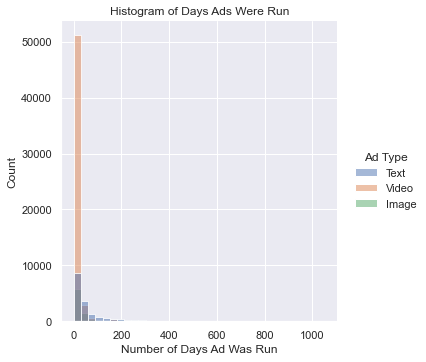

In [7]:
p = sns.displot(x = 'Num_of_Days', data = data, binwidth = 30, hue = 'Ad_Type');
plt.xlabel('Number of Days Ad Was Run');
p._legend.set_title('Ad Type');
plt.title('Histogram of Days Ads Were Run');

#### There are some large outliers, so just take up to the 90th percentile of values

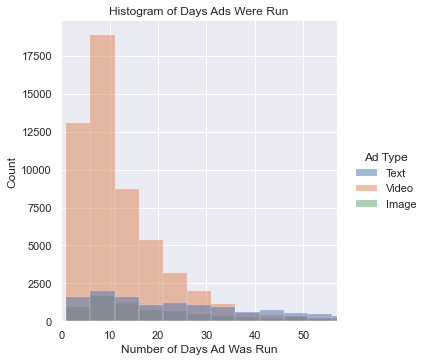

In [8]:
p = sns.displot(x = 'Num_of_Days', data = data, binwidth = 5, hue = 'Ad_Type');
plt.xlabel('Number of Days Ad Was Run');
plt.xlim([0, np.percentile(data['Num_of_Days'], 90)]);
p._legend.set_title('Ad Type');
plt.title('Histogram of Days Ads Were Run');

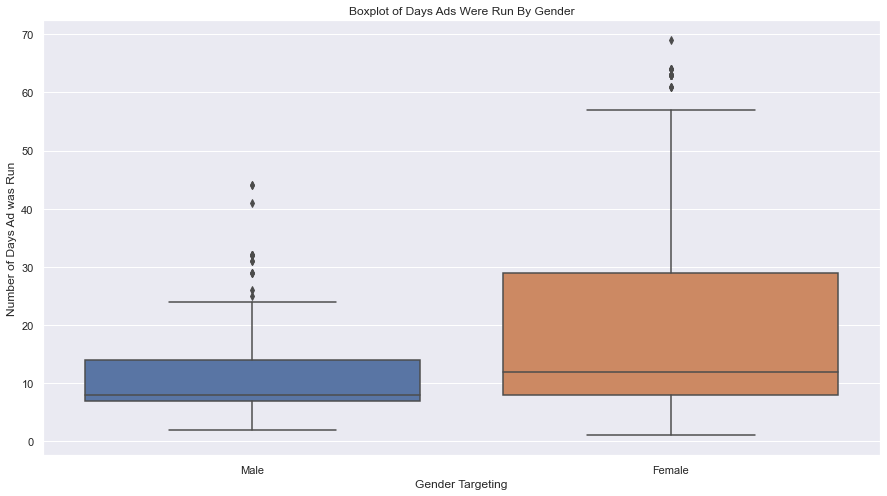

In [9]:
male_or_female = data.loc[(data['Gender_Targeting'] == 'Female') | (data['Gender_Targeting'] == 'Male')]
sns.boxplot(x = male_or_female['Gender_Targeting'], y = 'Num_of_Days', data = data);
plt.ylabel('Number of Days Ad was Run');
plt.xlabel('Gender Targeting');
plt.title('Boxplot of Days Ads Were Run By Gender');

In [10]:
data.loc[:, 'Date_Range_Start'] = pd.to_datetime(data['Date_Range_Start'])
data.loc[:, 'Date_Range_End'] = pd.to_datetime(data['Date_Range_End'])
data['Weekday'] = data['Date_Range_Start'].dt.weekday

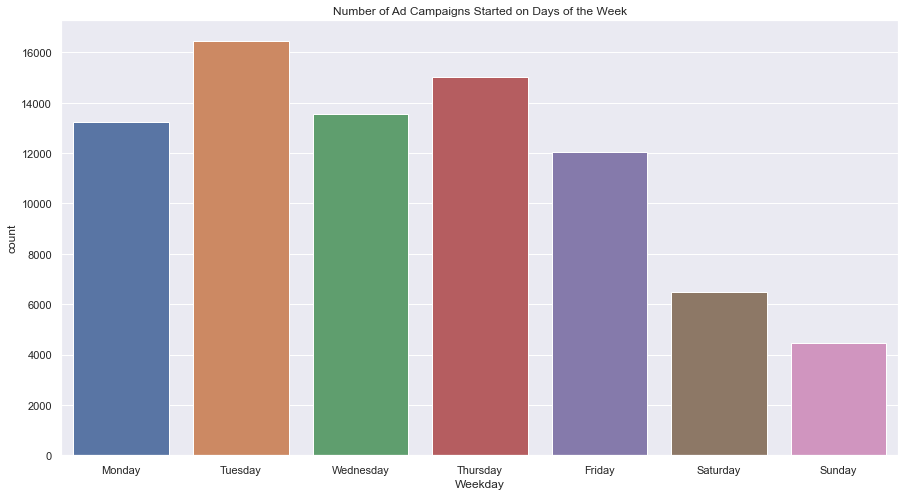

In [11]:
sns.countplot(x='Weekday', data=data);
plt.xticks(np.arange(0, 7), ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'));
plt.title('Number of Ad Campaigns Started on Days of the Week');

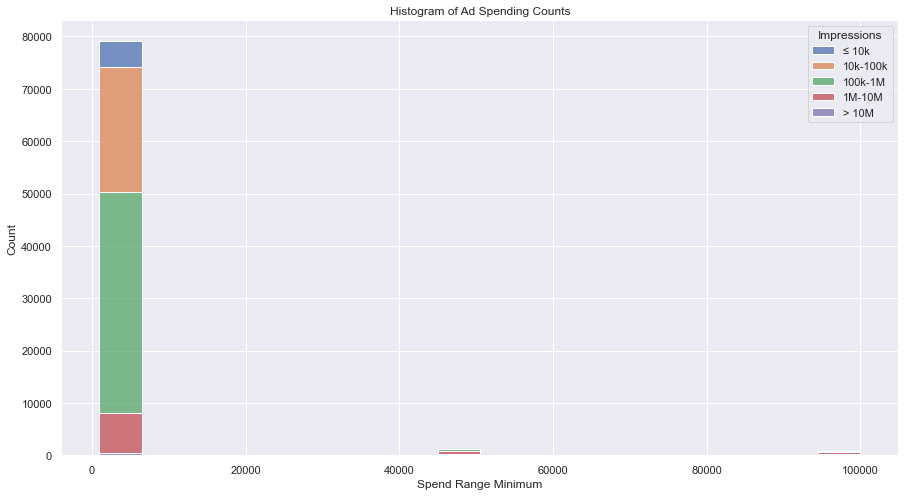

In [12]:
sns.histplot(x = 'Spend_Range_Min_USD', hue = 'Impressions', data = data, multiple = 'stack')
plt.xlabel('Spend Range Minimum');
plt.title('Histogram of Ad Spending Counts');

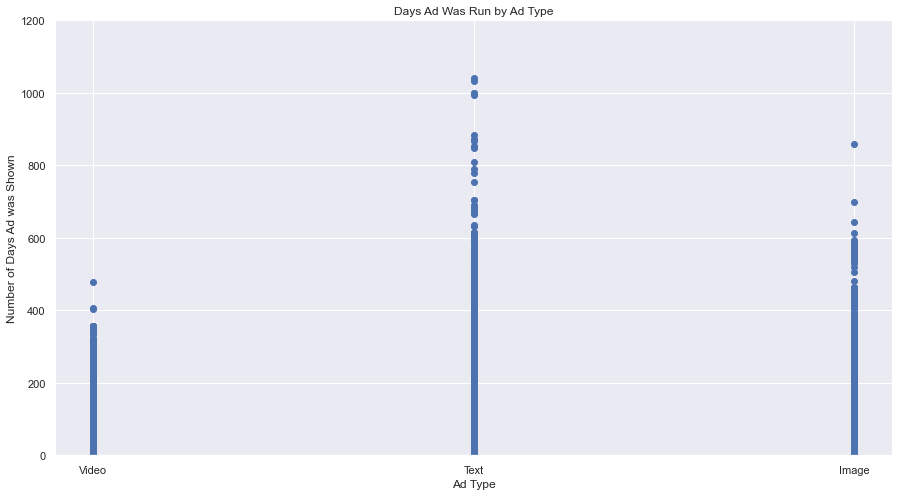

In [13]:
plt.scatter(data['Ad_Type_Code'], data['Num_of_Days']);
plt.xticks(np.arange(1,4), ('Video', 'Text', 'Image'));
plt.ylabel('Number of Days Ad was Shown');
plt.xlabel('Ad Type');
plt.ylim(0, 1200, 50);
plt.title('Days Ad Was Run by Ad Type');

In [14]:
min = data['Date_Range_Start'].min()
max = data['Date_Range_End'].max()
print('Ads Date from {} to {}'.format(min, max))

Ads Date from 2018-05-31 00:00:00 to 2021-10-04 00:00:00


In [15]:
#Get top ten advertisers in new dataframe
top_10_advertisers = pd.DataFrame(data['Advertiser_Name'].value_counts()[:10])
top_10_advertisers.reset_index(inplace = True)
top_10_advertisers.rename(columns = {'index': 'Advertiser', 'Advertiser_Name' : 'Count'}, inplace = True)   

#create new columns in full datafor ad counts and year
values = data['Advertiser_Name'].value_counts().to_dict()
data['Advertiser_Counts'] = data['Advertiser_Name'].map(values)
data['Year'] = data['Date_Range_Start'].dt.year

#create columns
top_10_advertisers['2018_count'] = pd.Series(dtype='int')
top_10_advertisers['2019_count'] = pd.Series(dtype='int')
top_10_advertisers['2020_count'] = pd.Series(dtype='int')
top_10_advertisers['2021_count'] = pd.Series(dtype='int')

#loop through data to get counts for each year
top_10_advertisers['2018_count'] = [len(data[(data['Advertiser_Name'] == item) & (data['Year'] == 2018)]) for item in top_10_advertisers['Advertiser']]
top_10_advertisers['2019_count'] = [len(data[(data['Advertiser_Name'] == item) & (data['Year'] == 2019)]) for item in top_10_advertisers['Advertiser']]
top_10_advertisers['2020_count'] = [len(data[(data['Advertiser_Name'] == item) & (data['Year'] == 2020)]) for item in top_10_advertisers['Advertiser']]
top_10_advertisers['2021_count'] = [len(data[(data['Advertiser_Name'] == item) & (data['Year'] == 2021)]) for item in top_10_advertisers['Advertiser']]

top_10_advertisers


,Advertiser,Count,2018_count,2019_count,2020_count,2021_count
0,BIDEN FOR PRESIDENT,10708,0,125,10583,0
1,MIKE BLOOMBERG 2020 INC,7996,0,965,7031,0
2,"DONALD J. TRUMP FOR PRESIDENT, INC.",4884,66,289,4529,0
3,TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE,3504,482,1007,2015,0
4,NRSC,1826,386,6,1225,209
5,REPUBLICAN NATIONAL COMMITTEE,1508,458,96,825,129
6,NRCC,1370,528,135,665,42
7,SENATE LEADERSHIP FUND,1297,651,0,646,0
8,CONGRESSIONAL LEADERSHIP FUND,1279,566,32,679,2
9,DNC SERVICES CORP / DEMOCRATIC NATIONAL COMMITTEE,1272,71,112,1026,63


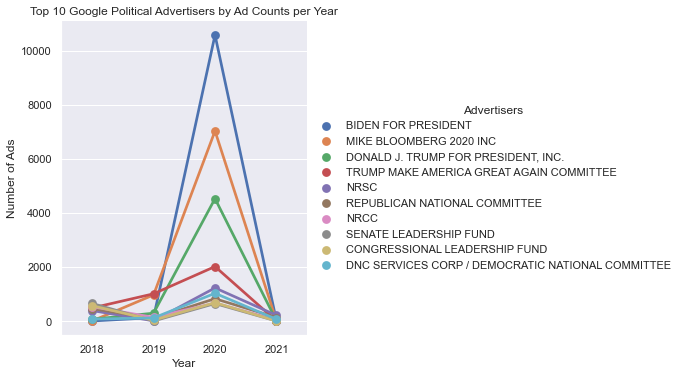

In [16]:
#Transpose rows and columns
df_transpose = top_10_advertisers.transpose()
#Make advertisers the column names
df_transpose.columns = df_transpose.iloc[0]
df_transpose.drop(['Count', 'Advertiser'], inplace = True)
#Add year column
df_transpose['Year'] = [2018, 2019, 2020, 2021]

df_transpose = df_transpose.astype(int)

df_melt = df_transpose.melt('Year', var_name='Advertisers',  value_name='Number of Ads')
g = sns.catplot(x="Year", y="Number of Ads", hue='Advertisers', data=df_melt, kind='point');
plt.title('Top 10 Google Political Advertisers by Ad Counts per Year');

***

## Questions for Reviewers

 - How might we effectively create data visualizations using the wide ranging, often redundant observations in our dataframes?
 - How might we represent these binned ranges in order to create better visualizatons and more meaningful machine learning models?
 - What additional data visualizations might we produce for P3 that leverage tools we have learned in class? 
 - What additional data visualizations might we produce for P3 that goes beyond what we have learned in class? 
 - What types of supervised or unsupervised learning would work best to analyze our data going forward?

